# Analyzing Brazilian E-Commerce Company

The goal of this project is to practice EDA, and K-means klustering.

## Import modules

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load Data and Build Main DataFrame

In [83]:
reviews     = pd.read_csv("order_reviews_dataset.csv")
order_items = pd.read_csv("order_items_dataset.csv")
products    = pd.read_csv("products_dataset.csv")
english     = pd.read_csv("product_category_name_translation.csv")
delivery    = pd.read_csv("orders_dataset.csv")
customer_state =  pd.read_csv("customers_dataset.csv")

In [32]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [33]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [34]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [35]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [84]:
df = pd.merge(order_items, products, how="left", on="product_id")

In [85]:
df = pd.merge(df, english, how="left", on="product_category_name")

In [86]:
df = pd.merge(df, reviews, how="left", on="order_id")

In [87]:
df = pd.merge(df, delivery, how="left", on="order_id")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113314 entries, 0 to 113313
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113314 non-null  object 
 1   order_item_id                  113314 non-null  int64  
 2   product_id                     113314 non-null  object 
 3   seller_id                      113314 non-null  object 
 4   shipping_limit_date            113314 non-null  object 
 5   price                          113314 non-null  float64
 6   freight_value                  113314 non-null  float64
 7   product_category_name          111702 non-null  object 
 8   product_name_lenght            111702 non-null  float64
 9   product_description_lenght     111702 non-null  float64
 10  product_photos_qty             111702 non-null  float64
 11  product_weight_g               113296 non-null  float64
 12  product_length_cm             

In [8]:
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [88]:
df.drop(columns=['shipping_limit_date', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'order_approved_at'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113314 entries, 0 to 113313
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113314 non-null  object 
 1   order_item_id                  113314 non-null  int64  
 2   product_id                     113314 non-null  object 
 3   seller_id                      113314 non-null  object 
 4   price                          113314 non-null  float64
 5   product_category_name_english  111678 non-null  object 
 6   review_score                   112372 non-null  float64
 7   customer_id                    113314 non-null  object 
 8   order_status                   113314 non-null  object 
 9   order_purchase_timestamp       113314 non-null  object 
 10  order_delivered_carrier_date   112111 non-null  object 
 11  order_delivered_customer_date  110839 non-null  object 
 12  order_estimated_delivery_date 

In [11]:
df.head()

,order_id,order_item_id,product_id,seller_id,price,product_category_name_english,review_score,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,cool_stuff,5.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,pet_shop,4.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,furniture_decor,5.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,perfumery,4.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,garden_tools,5.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


## Data Cleaning

In [ ]:
# I want to change all dates to date-time and remove the times. 
# To do this I will change to date-time first, then date (to remove time)
# then change back to date-time again to only have date in date-time format:

In [89]:
# Change to date-time:
df.order_purchase_timestamp      = pd.to_datetime(df.order_purchase_timestamp)
df.order_delivered_carrier_date  = pd.to_datetime(df.order_delivered_carrier_date)
df.order_delivered_customer_date = pd.to_datetime(df.order_delivered_customer_date)
df.order_estimated_delivery_date = pd.to_datetime(df.order_estimated_delivery_date)

In [90]:
# Remove timestamps: change to date first, then to date-time
df.order_purchase_timestamp      = df.order_purchase_timestamp.dt.date
df.order_delivered_carrier_date  = df.order_delivered_carrier_date.dt.date
df.order_delivered_customer_date = df.order_delivered_customer_date.dt.date
df.order_estimated_delivery_date = df.order_estimated_delivery_date.dt.date

In [91]:
# Change to date-time:
df.order_purchase_timestamp      = pd.to_datetime(df.order_purchase_timestamp)
df.order_delivered_carrier_date  = pd.to_datetime(df.order_delivered_carrier_date)
df.order_delivered_customer_date = pd.to_datetime(df.order_delivered_customer_date)
df.order_estimated_delivery_date = pd.to_datetime(df.order_estimated_delivery_date)

In [92]:
# Example output:
df.order_purchase_timestamp 

0        2017-09-13
1        2017-04-26
2        2018-01-14
3        2018-08-08
4        2017-02-04
            ...    
113309   2018-04-23
113310   2018-07-14
113311   2017-10-23
113312   2017-08-14
113313   2018-06-09
Name: order_purchase_timestamp, Length: 113314, dtype: datetime64[ns]

In [93]:
df.order_status.value_counts()

delivered      110840
shipped          1196
canceled          546
invoiced          364
processing        358
unavailable         7
approved            3
Name: order_status, dtype: int64

In [94]:
# I only want to look at delivered orders:
df = df.loc[df.order_status == "delivered"]

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110840 entries, 0 to 113313
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110840 non-null  object        
 1   order_item_id                  110840 non-null  int64         
 2   product_id                     110840 non-null  object        
 3   seller_id                      110840 non-null  object        
 4   price                          110840 non-null  float64       
 5   product_category_name_english  109273 non-null  object        
 6   review_score                   110013 non-null  float64       
 7   customer_id                    110840 non-null  object        
 8   order_status                   110840 non-null  object        
 9   order_purchase_timestamp       110840 non-null  datetime64[ns]
 10  order_delivered_carrier_date   110838 non-null  datetime64[ns]
 11  

In [96]:
# Remove lines which do not have delivery time:
df.order_delivered_customer_date.isnull().sum()

8

In [97]:
df.dropna(subset=["order_delivered_customer_date"], inplace=True)

In [98]:
df.order_delivered_customer_date.isnull().sum()

0

In [99]:
# Create a "Delivery Time"-column:
df["delivery_time"] = df.order_delivered_customer_date - df.order_purchase_timestamp

In [100]:
df.head()

,order_id,order_item_id,product_id,seller_id,price,product_category_name_english,review_score,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,cool_stuff,5.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13,2017-09-19,2017-09-20,2017-09-29,7 days
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,pet_shop,4.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26,2017-05-04,2017-05-12,2017-05-15,16 days
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,furniture_decor,5.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14,2018-01-16,2018-01-22,2018-02-05,8 days
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,perfumery,4.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08,2018-08-10,2018-08-14,2018-08-20,6 days
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,garden_tools,5.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04,2017-02-16,2017-03-01,2017-03-17,25 days


In [101]:
# Delivery time has "days" in it. I want to remove that:
df.delivery_time = df.delivery_time / pd.to_timedelta(1, unit='D')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110832 entries, 0 to 113313
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110832 non-null  object        
 1   order_item_id                  110832 non-null  int64         
 2   product_id                     110832 non-null  object        
 3   seller_id                      110832 non-null  object        
 4   price                          110832 non-null  float64       
 5   product_category_name_english  109265 non-null  object        
 6   review_score                   110005 non-null  float64       
 7   customer_id                    110832 non-null  object        
 8   order_status                   110832 non-null  object        
 9   order_purchase_timestamp       110832 non-null  datetime64[ns]
 10  order_delivered_carrier_date   110831 non-null  datetime64[ns]
 11  

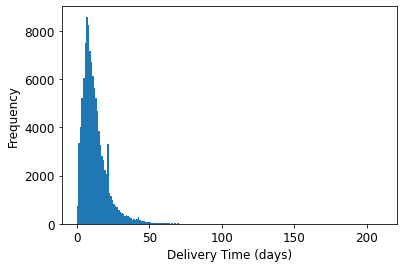

In [103]:
df.delivery_time.plot(kind="hist", bins=200, fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Delivery Time (days)", fontsize=12)
plt.show()

In [104]:
df.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
price                               0
product_category_name_english    1567
review_score                      827
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_carrier_date        1
order_delivered_customer_date       0
order_estimated_delivery_date       0
delivery_time                       0
dtype: int64

In [105]:
# The number of NA is small compared to total data, so I can afford to drop
# them without too much loss of data:

df.dropna(inplace=True)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108449 entries, 0 to 113313
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       108449 non-null  object        
 1   order_item_id                  108449 non-null  int64         
 2   product_id                     108449 non-null  object        
 3   seller_id                      108449 non-null  object        
 4   price                          108449 non-null  float64       
 5   product_category_name_english  108449 non-null  object        
 6   review_score                   108449 non-null  float64       
 7   customer_id                    108449 non-null  object        
 8   order_status                   108449 non-null  object        
 9   order_purchase_timestamp       108449 non-null  datetime64[ns]
 10  order_delivered_carrier_date   108449 non-null  datetime64[ns]
 11  

## Analysis

### Distribution of Reviews

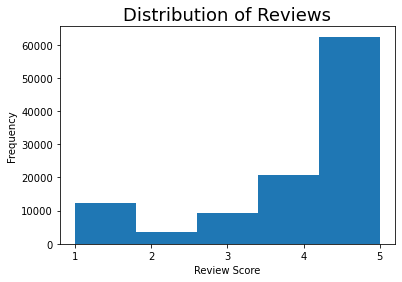

In [107]:
df.review_score.plot(kind="hist", bins=5)
plt.title("Distribution of Reviews", fontsize=18)
plt.xlabel("Review Score")
plt.xticks(range(1,6))
plt.savefig("Plot_3.png", transparent = True, dpi=200)
plt.show()

### Product Categories: Revenue, Review Score, and Delivery Time

In [108]:
df2 = df.groupby("product_category_name_english").agg({"price": lambda x: x.sum(),
                                                            "review_score": lambda x: x.mean(),
                                                            "delivery_time": lambda x: x.mean()})

In [109]:
df2.rename(columns = {"price": "Revenue", "review_score": "Average Review", 
                       "delivery_time": "Avg Delivery Days"}, inplace=True)

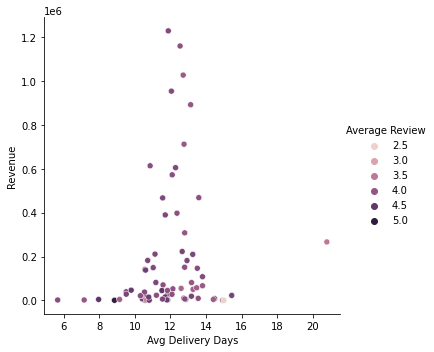

In [110]:
sns.relplot(data=df2, x="Avg Delivery Days", y="Revenue", hue="Average Review")
plt.show()

#### Discontinue products with low revenue and low review score

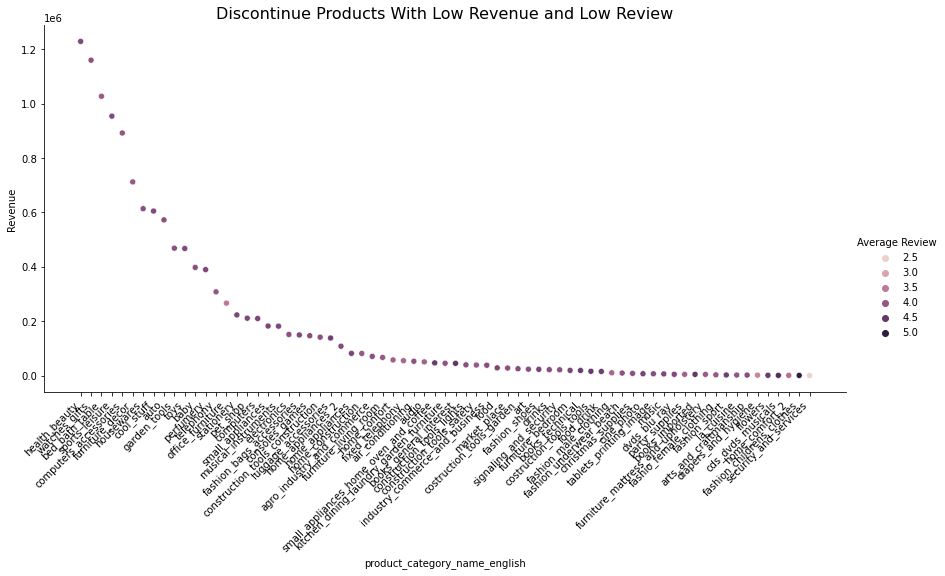

In [111]:
sns.relplot(data=df2.sort_values("Revenue",ascending=False), x="product_category_name_english", y="Revenue", hue="Average Review", 
            height=6, aspect=2) #, rotation=45)
plt.xticks(rotation = 45, horizontalalignment = "right", fontsize=10)
plt.title("Discontinue Products With Low Revenue and Low Review", fontsize=16)
plt.show()

#### Top 10 and bottom 10 product-categories by revenue:

In [112]:
dfTopBottomRev = df2.sort_values("Revenue", ascending=False).head(10)

In [113]:
dfTopBottomRev = dfTopBottomRev.append(df2.sort_values("Revenue", ascending=False).tail(10))

In [114]:
dfTopBottomRev

,Revenue,Average Review,Avg Delivery Days
product_category_name_english,,,
health_beauty,1228986.81,4.190778,11.877009
watches_gifts,1160011.57,4.071613,12.538211
bed_bath_table,1027333.65,3.920983,12.712517
sports_leisure,954117.99,4.166331,12.051334
computers_accessories,892168.64,3.985139,13.130622
furniture_decor,712235.53,3.949988,12.760603
housewares,613843.72,4.108407,10.857080
cool_stuff,605088.81,4.194700,12.285019
auto,572632.84,4.116132,12.095967


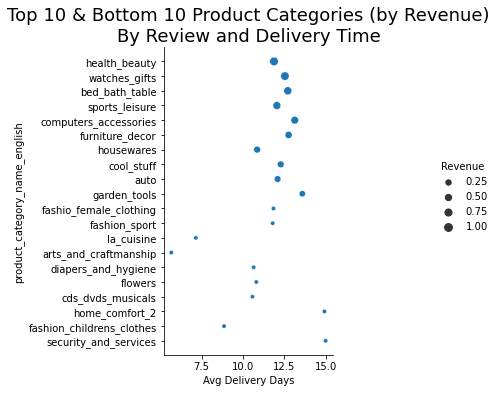

In [115]:
sns.relplot(data=dfTopBottomRev, x="Avg Delivery Days", y="product_category_name_english", size="Revenue")
plt.title("Top 10 & Bottom 10 Product Categories (by Revenue)\nBy Review and Delivery Time", fontsize=18)
plt.show()

### Top 10 & bottom 10 most/least popoular product categories

In [116]:
popular = df.groupby("product_category_name_english")["review_score"].mean().nlargest(10)

In [117]:
non_pop = df.groupby("product_category_name_english")["review_score"].mean().nsmallest(10).sort_values(ascending=False)

In [118]:
product_popularity = pd.concat([popular, non_pop], axis=0)

In [119]:
product_popularity

product_category_name_english
fashion_childrens_clothes                5.000000
cds_dvds_musicals                        4.642857
books_general_interest                   4.511278
books_imported                           4.508772
costruction_tools_tools                  4.444444
small_appliances_home_oven_and_coffee    4.438356
flowers                                  4.419355
books_technical                          4.393939
food_drink                               4.369004
fashion_sport                            4.366667
furniture_mattress_and_upholstery        3.891892
home_confort                             3.851163
party_supplies                           3.833333
audio                                    3.830084
fixed_telephony                          3.758893
fashion_male_clothing                    3.758065
home_comfort_2                           3.629630
office_furniture                         3.517428
diapers_and_hygiene                      3.378378
security_and_service

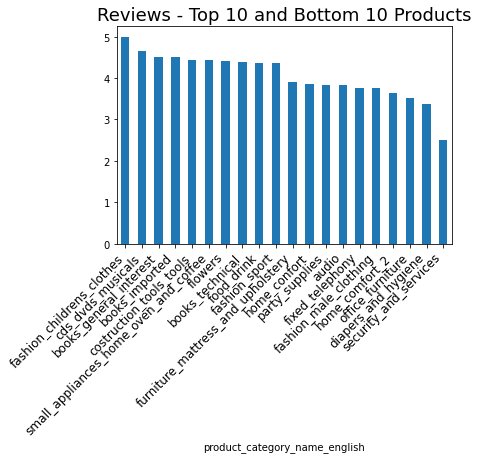

In [120]:
product_popularity.plot(kind="bar")
plt.title("Reviews - Top 10 and Bottom 10 Products", fontsize=18)
plt.xticks(rotation = 45, horizontalalignment = "right", fontsize=12)
plt.show()

### Top Customers

In [121]:
customer = df.groupby("customer_id")["price"].sum().reset_index().sort_values("price", ascending=False)

In [122]:
customer.rename(columns={"price":"total_paid"}, inplace=True)

In [123]:
customer["share_of_tot_sales"] = (customer.total_paid / customer.total_paid.sum())*100

In [124]:
customer["cumsum_share_of_tot_sales"] = customer.share_of_tot_sales.cumsum()

In [125]:
customer

,customer_id,total_paid,share_of_tot_sales,cumsum_share_of_tot_sales
8146,1617b1357756262bfa56ab541c47bc16,13440.00,0.103454,0.103454
87416,ec5b2ba62e574342386871631fafd3fc,7160.00,0.055114,0.158568
73684,c6e2731c5b391845f6800c97401a43a9,6735.00,0.051842,0.210410
23598,3fd6777bbce08a352fddd04e4a7cc8f6,6499.00,0.050026,0.260436
1971,05455dfa7cd02f13d132aa7a6a9729c6,5934.60,0.045681,0.306117
...,...,...,...,...
78049,d2c63ad286e3ca9dd69218008d61ff81,2.90,0.000022,99.999952
9016,184e8e8e48937145eb96c721ef1f0747,2.29,0.000018,99.999970
61864,a790343ca6f3fee08112d678b43aa7c5,2.20,0.000017,99.999987
58971,9f9d249355f63c5c1216a82b802452c1,0.85,0.000007,99.999993


Text(42000, 70, '40000 customers (about 42% of total customers) \ncontribute to approximately 80% of total sales.')

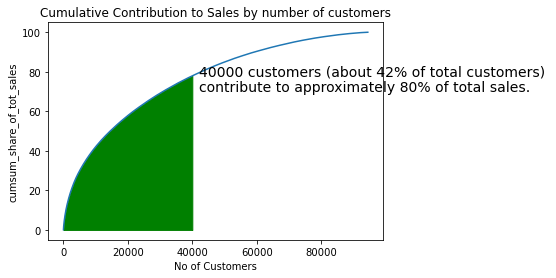

In [126]:
ax = sns.lineplot(x=range(1,len(customer)+1), y="cumsum_share_of_tot_sales", data=customer)
ax.set_xlabel("No of Customers")
ax.set_title("Cumulative Contribution to Sales by number of customers")
a=np.arange(1,len(customer)+1)
b=customer.cumsum_share_of_tot_sales
plt.fill_between(a, b, 0,
                 where = (a >= 0) & (a <= 40000),
                 color = 'g')
ax.text(42000, 70, """40000 customers (about 42% of total customers) 
contribute to approximately 80% of total sales.""", fontsize=14)

### Over time: No of orders, Revenue. Aggregate per month

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108449 entries, 0 to 113313
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       108449 non-null  object        
 1   order_item_id                  108449 non-null  int64         
 2   product_id                     108449 non-null  object        
 3   seller_id                      108449 non-null  object        
 4   price                          108449 non-null  float64       
 5   product_category_name_english  108449 non-null  object        
 6   review_score                   108449 non-null  float64       
 7   customer_id                    108449 non-null  object        
 8   order_status                   108449 non-null  object        
 9   order_purchase_timestamp       108449 non-null  datetime64[ns]
 10  order_delivered_carrier_date   108449 non-null  datetime64[ns]
 11  

In [128]:
timeS = df.groupby(df["order_purchase_timestamp"].dt.to_period('M')).agg(
    {"order_id": lambda x: x.count(), "price": lambda x: x.sum().round()})

In [130]:
orders_and_rev = df.groupby(df["order_purchase_timestamp"].dt.to_period('M')).agg(
    {"order_id": lambda x: x.count(), "price": lambda x: x.sum().round()})

In [134]:
orders_and_rev.rename(columns={"order_id":"no_of_orders", "price":"revenue"}, inplace=True)

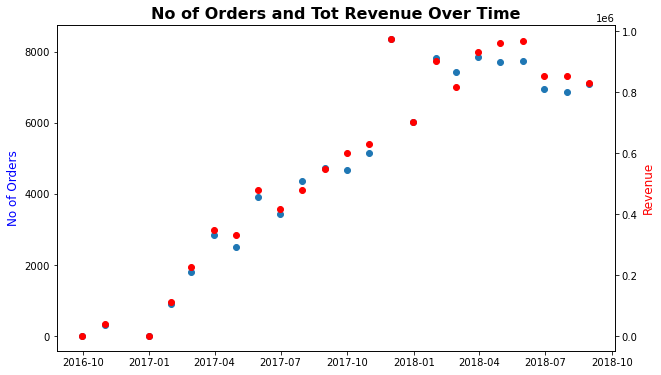

In [144]:
fig,ax1 = plt.subplots(figsize=(10,6))

ax1.plot_date(orders_and_rev.index, orders_and_rev.no_of_orders)
ax2 = ax1.twinx()
ax2.plot_date(orders_and_rev.index, orders_and_rev.revenue, color='r')
plt.title("No of Orders and Tot Revenue Over Time", fontsize=16, fontweight="bold")

ax1.set_ylabel("No of Orders", color='b', fontsize=12)
ax2.set_ylabel("Revenue", color='r', fontsize=12)

plt.show()

## K-means clustering

In [145]:
custCluster = df[["customer_id", "order_id", "price", "review_score", "delivery_time"]]

In [146]:
custClustTable = custCluster.groupby("customer_id").agg({"order_id": lambda x: x.count(), "price": lambda x: x.sum(),
                                       "review_score": lambda x: x.mean(), 
                                        "delivery_time": lambda x: x.mean()}).sort_values("price", ascending=False).round(2)

In [147]:
custClustTable.rename(columns = {'order_id': 'no_of_purchases', 'price': 'purchase_volume', 
                                 'review_score': 'avg_review', 'delivery_time': 'avg_delivery_time'}, inplace=True)

In [148]:
custClustTable.head()

,no_of_purchases,purchase_volume,avg_review,avg_delivery_time
customer_id,,,,
1617b1357756262bfa56ab541c47bc16,8,13440.0,1.0,18.0
ec5b2ba62e574342386871631fafd3fc,4,7160.0,1.0,11.0
c6e2731c5b391845f6800c97401a43a9,1,6735.0,5.0,19.0
3fd6777bbce08a352fddd04e4a7cc8f6,1,6499.0,5.0,12.0
05455dfa7cd02f13d132aa7a6a9729c6,6,5934.6,1.0,19.0


In [149]:
custClustTable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94480 entries, 1617b1357756262bfa56ab541c47bc16 to 161b6d415e8b3413c6609c70cf405b5a
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   no_of_purchases    94480 non-null  int64  
 1   purchase_volume    94480 non-null  float64
 2   avg_review         94480 non-null  float64
 3   avg_delivery_time  94480 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.6+ MB


In [200]:
# custClustTable.dropna(inplace=True)

In [150]:
custClustTable.describe()

,no_of_purchases,purchase_volume,avg_review,avg_delivery_time
count,94480.000000,94480.000000,94480.000000,94480.000000
mean,1.147851,137.503165,4.157644,12.451958
std,0.550729,208.386974,1.282105,9.464054
min,1.000000,0.850000,1.000000,0.000000
25%,1.000000,45.900000,4.000000,7.000000
50%,1.000000,86.900000,5.000000,10.000000
75%,1.000000,149.900000,5.000000,16.000000
max,22.000000,13440.000000,5.000000,208.000000


In [151]:
# remove outliers:

<AxesSubplot:ylabel='Frequency'>

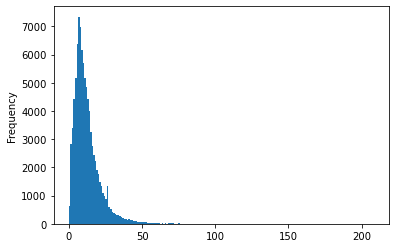

In [152]:
custClustTable.avg_delivery_time.plot(kind="hist", bins=200)

In [153]:
custClustTable = custClustTable[custClustTable.avg_delivery_time < 80]

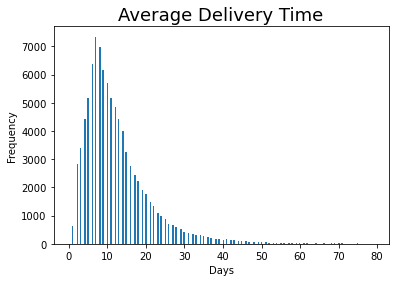

In [154]:
custClustTable.avg_delivery_time.plot(kind="hist", bins=200)
plt.title("Average Delivery Time", fontsize=18)
plt.xlabel("Days")
plt.savefig("Plot_2.png", transparent = True, dpi=200)
plt.show()

In [155]:
custClustTable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94379 entries, 1617b1357756262bfa56ab541c47bc16 to 161b6d415e8b3413c6609c70cf405b5a
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   no_of_purchases    94379 non-null  int64  
 1   purchase_volume    94379 non-null  float64
 2   avg_review         94379 non-null  float64
 3   avg_delivery_time  94379 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.6+ MB


In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [157]:
# first we have to get the inertia values for a variety of different cluster numbers
inertia_dict = {
    'clusters': []
    ,'inertia': []
}

for i in range(2,10): # no of clusters to try out. 
    scaler = StandardScaler()
    cluster = KMeans(n_clusters=i) # here we set the number of clusters for every iteration
    pipe = make_pipeline(scaler, cluster)
    pipe.fit(custClustTable)
    inertia_dict['clusters'].append(i)
    inertia_dict['inertia'].append(pipe['kmeans'].inertia_)

inertia_df = pd.DataFrame(inertia_dict)

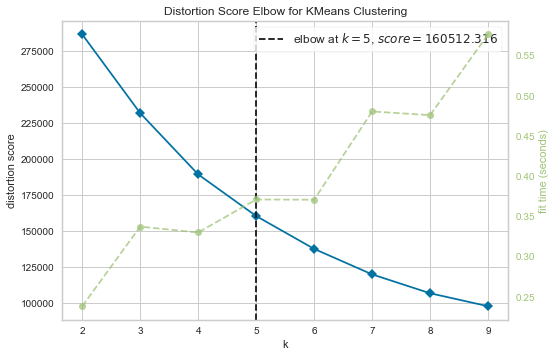

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [158]:
scaler = StandardScaler()
cluster = KMeans()

visualizer = KElbowVisualizer(cluster, k=(2,10))
visualizer.fit(scaler.fit_transform(custClustTable))
visualizer.show()

In [ ]:
# So 5 klusters seems good

In [159]:
scaler = StandardScaler()
cluster = KMeans(n_clusters=5)
pipe = make_pipeline(scaler, cluster)
pipe.fit(custClustTable)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=5))])

In [160]:
custClustTable['labels'] = pipe['kmeans'].labels_
custClustTable

,no_of_purchases,purchase_volume,avg_review,avg_delivery_time,labels
customer_id,,,,,
1617b1357756262bfa56ab541c47bc16,8,13440.00,1.0,18.0,3
ec5b2ba62e574342386871631fafd3fc,4,7160.00,1.0,11.0,3
c6e2731c5b391845f6800c97401a43a9,1,6735.00,5.0,19.0,3
3fd6777bbce08a352fddd04e4a7cc8f6,1,6499.00,5.0,12.0,3
05455dfa7cd02f13d132aa7a6a9729c6,6,5934.60,1.0,19.0,3
...,...,...,...,...,...
d2c63ad286e3ca9dd69218008d61ff81,1,2.90,5.0,11.0,1
184e8e8e48937145eb96c721ef1f0747,1,2.29,5.0,5.0,1
a790343ca6f3fee08112d678b43aa7c5,1,2.20,5.0,4.0,1


In [161]:
custClustTable.labels.value_counts()

1    69774
4    13557
0     6898
2     2167
3     1983
Name: labels, dtype: int64

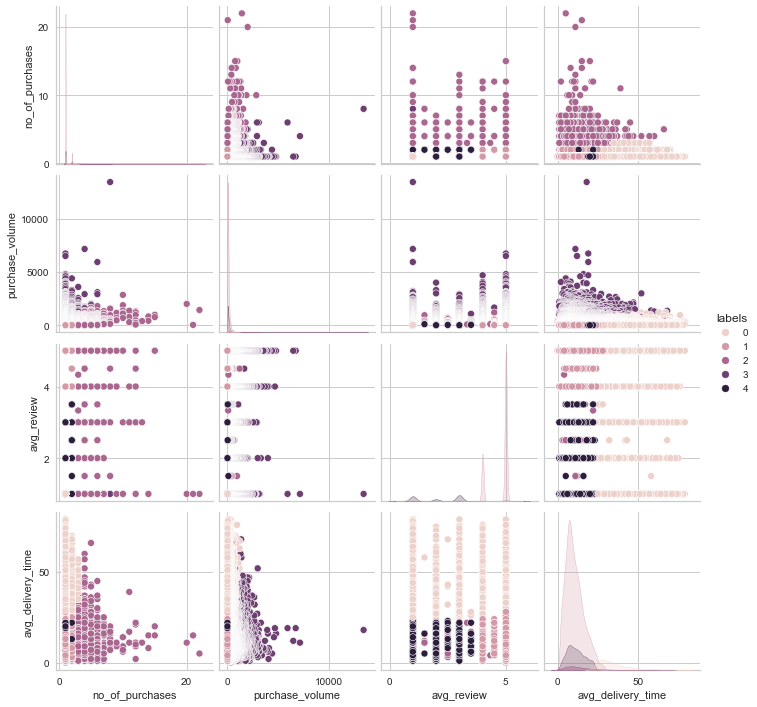

In [162]:
sns.pairplot(custClustTable, hue="labels")
sns.set(font_scale=2)
plt.show()

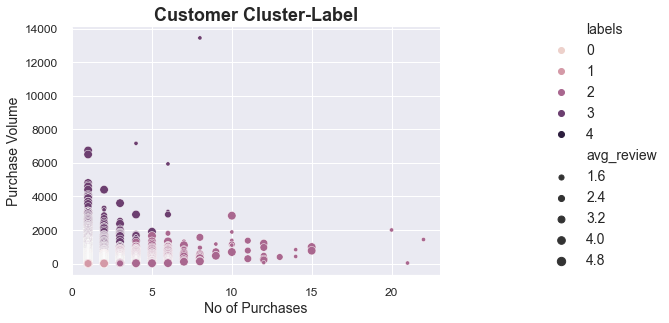

In [163]:
ax = sns.relplot(data=custClustTable, x="no_of_purchases", y="purchase_volume", hue="labels", 
            size="avg_review",
           height=5, aspect=1.5) 

plt.title("Customer Cluster-Label", fontsize=18, weight="bold")
plt.xlabel("No of Purchases", fontsize=14)
plt.ylabel('Purchase Volume', fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=12)

sns.move_legend(ax, "center left", bbox_to_anchor=(0.9, 0.6), 
                fontsize=14)

plt.show()